In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
from keras  import models, layers, optimizers

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_t, y_t), (x_tst, y_tst) = tf.keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt

In [17]:
def PlotImages(indTrain, indTest, x_tr = x_t, y_tr = y_t, x_tst = x_tst, y_tst = y_tst):
    plt.figure(figsize=[5,5])
    # Display the indTrain image in training data
    plt.subplot(121)
    plt.title("Train Data: {}".format(y_tr[indTrain]))
    print(x_tr[indTrain].shape)
    plt.imshow(x_tr[indTrain, :, :], cmap='gray')

    # Display the indTest image in testing data
    plt.subplot(122)
    plt.title("Test Data: {}".format(y_tst[indTest]))
    plt.imshow(x_tst[indTest,:,:], cmap='gray')


(60000, 28, 28)
(60000,)
5
(28, 28)
(28, 28)


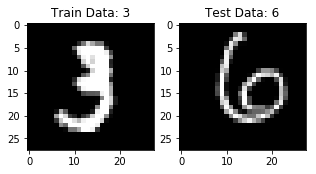

In [18]:
print(x_t.shape)
print(y_t.shape)
print(y_t[100])
#Now lets see the image
PlotImages(10,100)

In [6]:
y_tcat = keras.utils.to_categorical(y_t, num_classes=10)
print(y_tcat[100])
print(np.argmax(y_tcat[100]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [4]:
def mainDriverMNistKeras(opt, num_epochs=10):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
    x_train = x_train/255
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
    x_test = x_test/255

    y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
    y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

    network = models.Sequential()
    network.add(layers.Dense(512, activation="relu", input_shape =(28*28,), name="lay1"))
    network.add(layers.Dense(20, activation="relu"), name="lay2")
    network.add(layers.Dense(10, activation="softmax"),, name="Final Layer")

    network.compile(optimizer= opt, loss = "categorical_crossentropy", metrics = ["accuracy"])
    network.fit(x_train, y_train_cat, epochs=num_epochs, batch_size=1024)

    y_pred_train = network.predict(x_train)
    print(y_pred_train[101])
    y_pred_train_val = np.argmax(y_pred_train, axis=1)
    result_train=(y_pred_train_val == y_train)
    print ("Num correct Train = ", np.sum(result_train), "and %Correct= ", np.sum(result_train)/len(result_train))
    y_pred_test = network.predict(x_test)
    y_pred_test_val = np.argmax(y_pred_test, axis=1)
    result_test=(y_pred_test_val == y_test)
    print ( "Num correct Test = ", np.sum(result_test), "and  %Correct= ", np.sum(result_test)/len(result_test))


In [5]:
OptPerf = mainDriverMNistKeras(optimizers.RMSprop(lr=0.001))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.7023 - acc: 0.7908     
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.2703 - acc: 0.9227     
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.1885 - acc: 0.9457     
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.1496 - acc: 0.9558     
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.1168 - acc: 0.9657     
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.0978 - acc: 0.9716     
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.0789 - acc: 0.9770     
Epoch 8/10
60000/60000 [==============================] - 4s - loss: 0.0691 - acc: 0.9795     
Epoch 9/10
60000/60000 [==============================] - 4s - loss: 0.0587 - acc: 0.9826     

In [ ]:
#Lets see some intermediate layer output
